## Imports and Data

In [1]:
# PLOTTING
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import calmap
import datetime
import os

# constants
dateString = datetime.datetime.now().strftime("%d-%m")
SAVE_PATH = f"plots/{dateString}/"
SAVE = True
if SAVE and (not os.path.exists(SAVE_PATH)):
    os.makedirs(SAVE_PATH)

In [2]:
# read data
df = pd.read_csv('data/cacas_latest.csv', index_col=0)
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df.head()

,datetime,user,emoji,count
0,2024-01-03 00:00:00,Sancho,caca,1
1,2024-01-03 00:00:00,Sancho,caca,1
2,2024-01-03 00:00:00,Sancho,caca,1
3,2024-01-03 00:02:00,Tom,caca,3
4,2024-01-03 00:03:00,Che,caca,3


## Poop Ranking

In [3]:
# Aggregation
agg_df = df.groupby(['user', 'emoji']).agg({
    'count': 'sum'
}).reset_index()

# Renaming columns
agg_df.columns = ['competidor', 'tipo', 'cantidad']

# Pivot the data for stacked bar plot
df_pivot = agg_df.pivot(index='competidor', columns='tipo', values='cantidad')

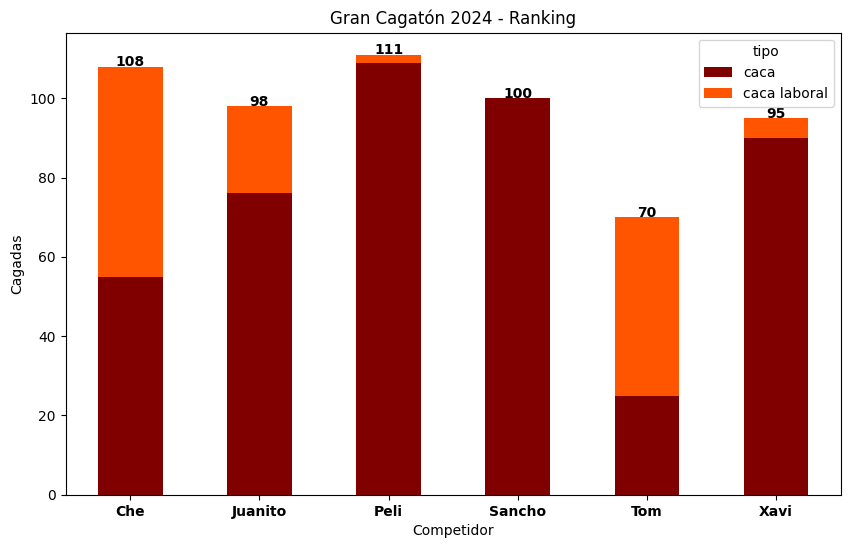

In [4]:
# Define the color list
palette = sns.color_palette("gist_heat", 2)

# Plot the data
df_pivot.plot(kind='bar', 
              stacked=True, 
              figsize=(10, 6),
              color=palette
              )
plt.title('Gran Cagatón 2024 - Ranking')
# Y axis
plt.ylabel('Cagadas')
# X axis
plt.xlabel('Competidor')
plt.xticks(rotation=0)
plt.xticks(fontsize=10, fontweight='bold')

# number above the bars
for i in range(len(df_pivot)):
    plt.text(i, df_pivot.iloc[i].sum() + 0.1, int(df_pivot.iloc[i].sum()), ha='center', fontsize=10, fontweight='bold')

# Save the plot
if SAVE:
    plt.savefig(f"{SAVE_PATH}ranking.png")

# Show the plot
plt.show()

## Poop Calendar

In [5]:
# convert datetime to date
df['date'] = pd.to_datetime(df['datetime'].dt.date)
df

,datetime,user,emoji,count,date
0,2024-01-03 00:00:00,Sancho,caca,1,2024-01-03
1,2024-01-03 00:00:00,Sancho,caca,1,2024-01-03
2,2024-01-03 00:00:00,Sancho,caca,1,2024-01-03
3,2024-01-03 00:02:00,Tom,caca,3,2024-01-03
4,2024-01-03 00:03:00,Che,caca,3,2024-01-03
...,...,...,...,...,...
571,2024-03-31 13:02:00,Juanito,caca,1,2024-03-31
572,2024-03-31 13:28:00,Peli,caca,1,2024-03-31
573,2024-03-31 16:15:00,Sancho,caca,1,2024-03-31
574,2024-03-31 19:02:00,Juanito,caca,1,2024-03-31


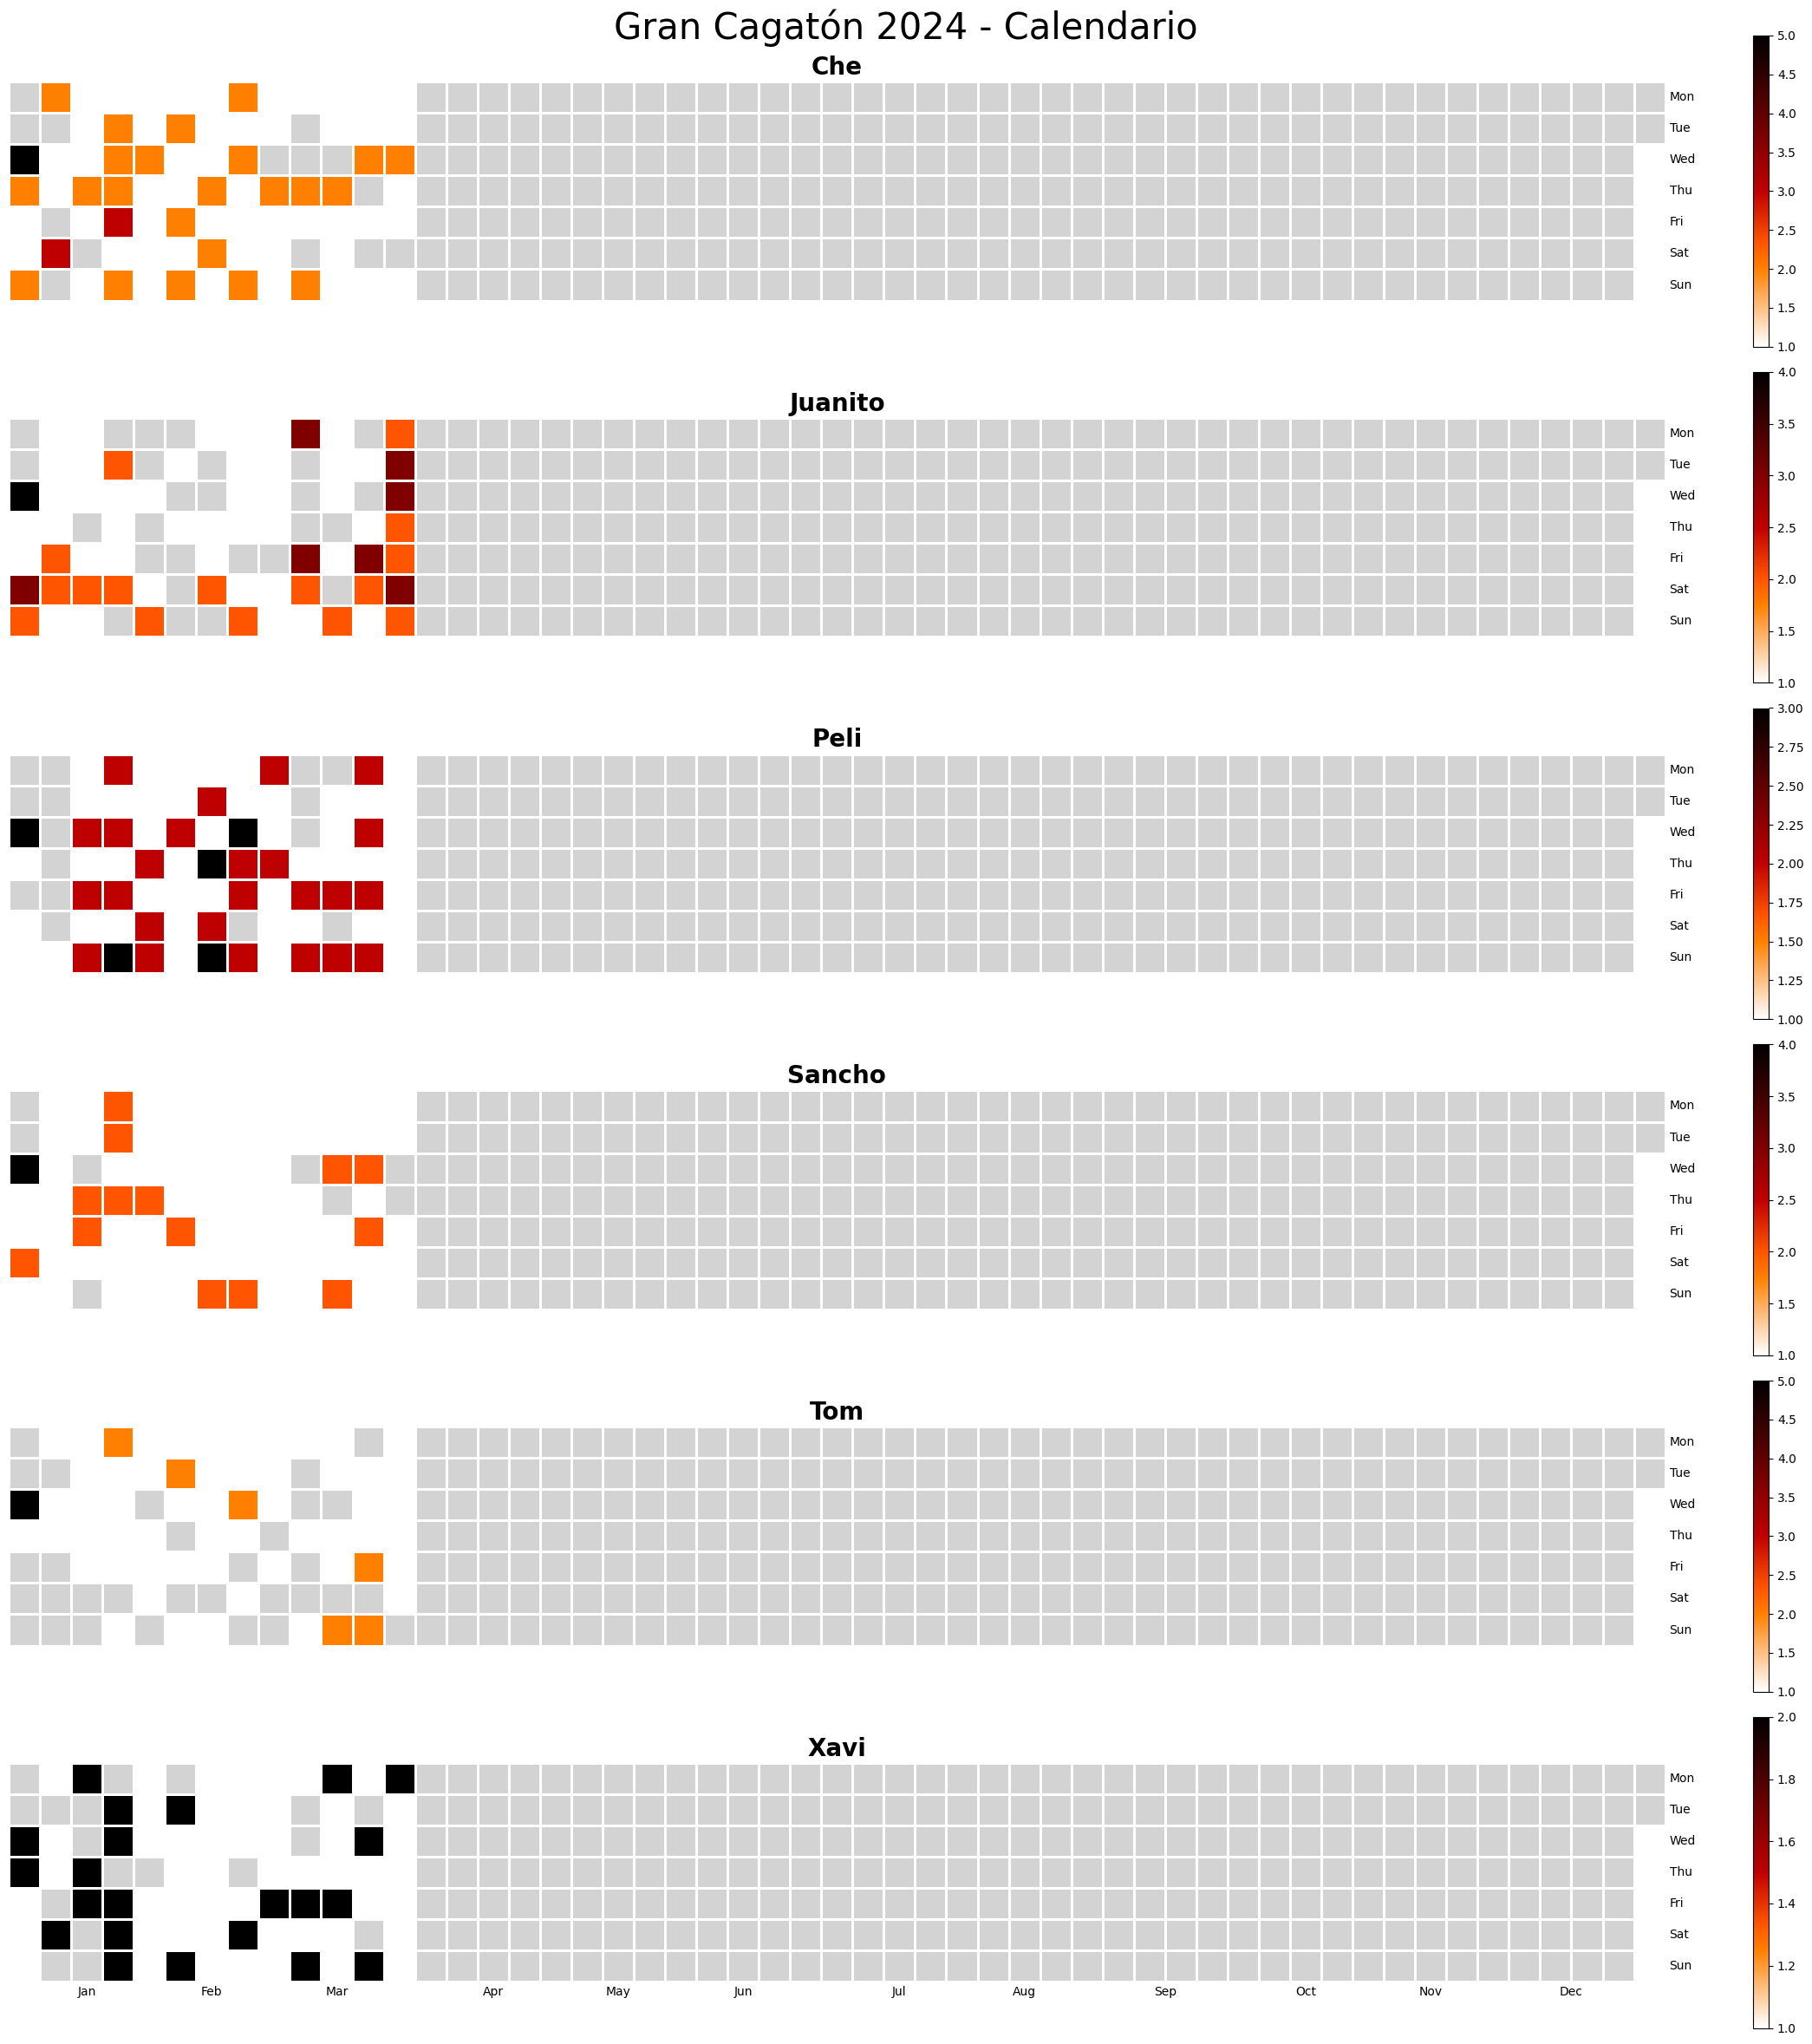

In [6]:
# Group data by user and date, summing the 'cantidad' values
grouped_data = df.groupby(['user', 'date'])['count'].sum().reset_index()

# Get unique users
unique_users = grouped_data['user'].unique()

# Create subplots for each user
fig, axes = plt.subplots(len(unique_users), 1, figsize=(21, 4 * len(unique_users)), sharex=True)

# Set the title for the entire plot
fig.suptitle('Gran Cagatón 2024 - Calendario', fontsize=30)

# Iterate through each user and create a calendar map
for i, user in enumerate(unique_users):
    user_data = grouped_data[grouped_data['user'] == user].set_index('date')
    cax = calmap.yearplot(
        user_data['count'], 
        year=user_data.index.year.unique()[0], 
        ax=axes[i], 
        cmap='gist_heat_r', 
        fillcolor='lightgrey',
        monthticks=1
    )
    fig.colorbar(cax.get_children()[1], ax=cax, orientation='vertical', pad=0.05, fraction=0.01)
    # set fontsize for axis labels
    axes[i].set_title(f"{user}")
    axes[i].title.set_fontsize(20)
    axes[i].title.set_fontweight('bold')

# center it
fig.tight_layout()

# save the plot in the 'plots' folder with day and month in the filename
if SAVE:
    plt.savefig(f"{SAVE_PATH}calendar.png")

plt.show()


## Poop Lineplot

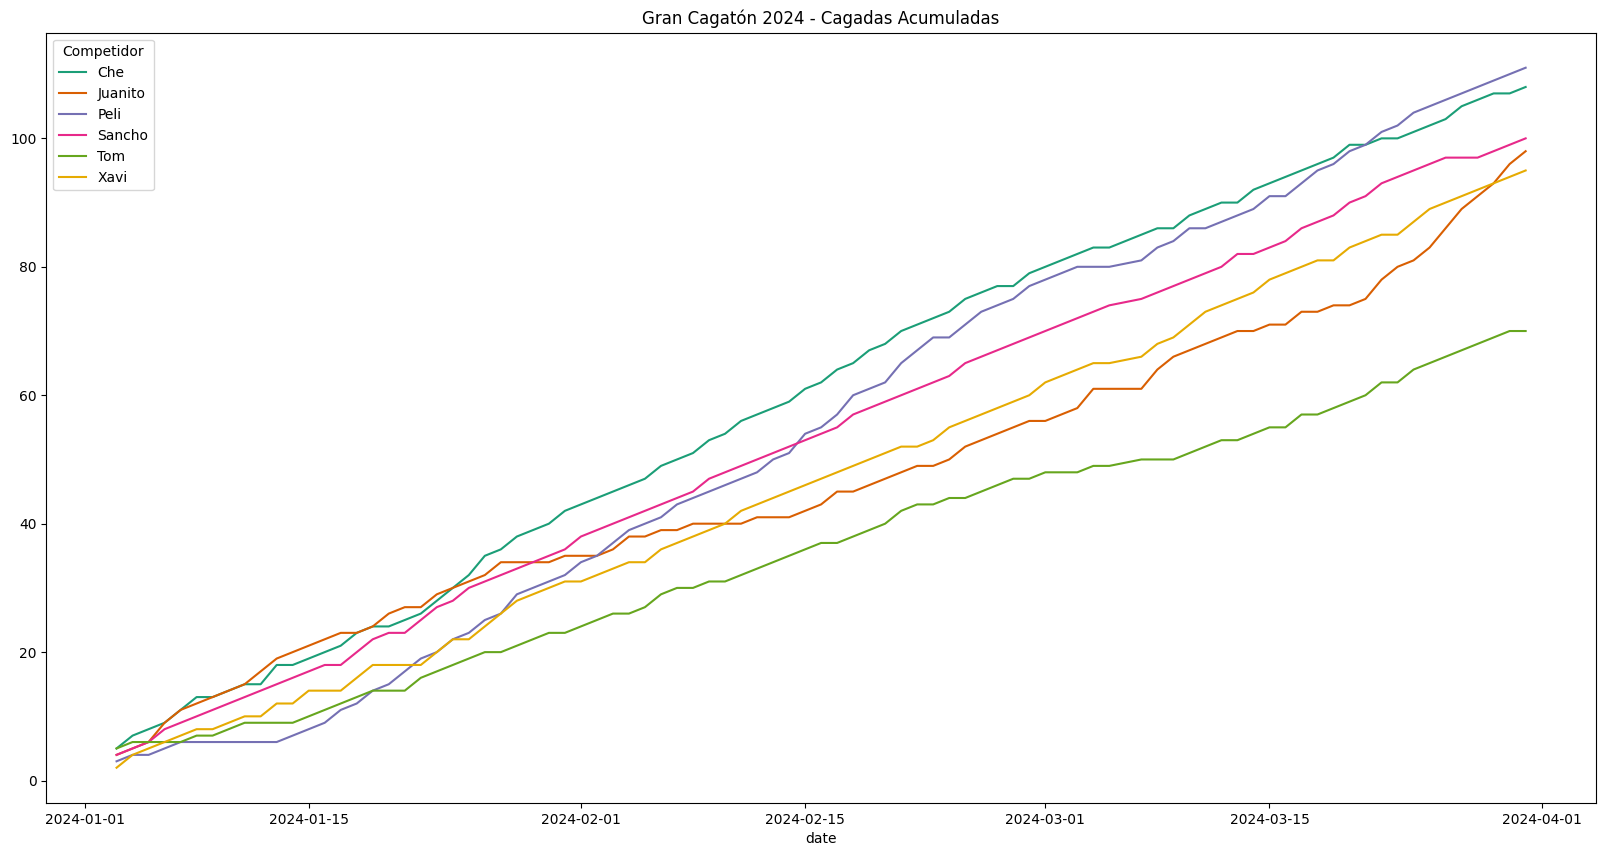

In [7]:
# group by date and user and sum the count
df_indexed_date = df.copy()
df_indexed_date.set_index('datetime', inplace=True)
df_indexed_date.sort_index(inplace=True)

# Group by date and user, sum the count
df_grouped = df_indexed_date.groupby([df_indexed_date.index.date, 'user'])['count'].sum()

# Unstack the user index
df_grouped.index.names = ['date', 'Competidor']
df_grouped = df_grouped.unstack()
df_grouped = df_grouped.fillna(0).cumsum()


# Plot
palette = sns.color_palette("Dark2")
df_grouped.plot(
    figsize=(20, 10),
    color=palette
)
plt.title('Gran Cagatón 2024 - Cagadas Acumuladas')

# Save the plot
if SAVE:
    plt.savefig(f"{SAVE_PATH}acumulado.png")